## Observations and Insights 

1--Based on the data collected and analyzed using the box plot graph. It appears, that the two Drug regimens, Capolmulin and Ramicane are keeping the Tumors at a smaller size than Infubinol and Ceftamin. 

2--The same conclusion can be made while looking at the Summary Data. The two best drug regimens seem to be Capolmulin and Ramicane. They have median amounts in the 40.0's while the rest of the Drugs all have median amounts and the low 50s. 

3--The study seems to have a good amount of Males to Females, neither is significantly more than another, it could be inferred the study has adequate amounts of each gender to study both the Male and Female reactions. For further studying, we could use our data to view how Tumor Growth compares to gender to see if there is a correalation of one drug being better for Men/Women or wose for Men/Women.

## Code and Graphs

In [137]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

import warnings
warnings.filterwarnings("ignore")

# Study data files
mouse_metadata_path = "Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_combo=pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
data_combo
# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [138]:
# Checking the number of mice.
Mice= data_combo["Mouse ID"].unique()
totalMice=print(np.count_nonzero(Mice, axis=0))

249


In [139]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Optional: Get all the data for the duplicate mouse ID. 
duplicateMice= data_combo[data_combo.duplicated(['Timepoint', 'Mouse ID'])]
duplicateMice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [140]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanedDF= data_combo.drop_duplicates(subset=["Timepoint", "Mouse ID"])
cleanedDF


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [141]:
# Checking the number of mice in the clean DataFrame.
ttlMice= cleanedDF["Mouse ID"].unique()
print(np.count_nonzero(ttlMice, axis=0))

249


## Summary Statistics

In [142]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume
#for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summ=cleanedDF[["Drug Regimen", "Tumor Volume (mm3)"]]
grouped=summ.groupby(["Drug Regimen"])

SummDF=pd.DataFrame({"Mean": grouped["Tumor Volume (mm3)"].mean(),
                     "Median": grouped["Tumor Volume (mm3)"].median(),
                     "Variance": grouped["Tumor Volume (mm3)"].var(),
                     "Standard Deviation": grouped["Tumor Volume (mm3)"].std(),
                     "SEM": grouped["Tumor Volume (mm3)"].sem()})
SummDF

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [143]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
    #for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
statDF=cleanedDF[["Drug Regimen", "Tumor Volume (mm3)"]]
SummStat= statDF.groupby("Drug Regimen").agg(func=['mean','median', 'var', 'std', 'sem'], axis=0)
SummStat

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

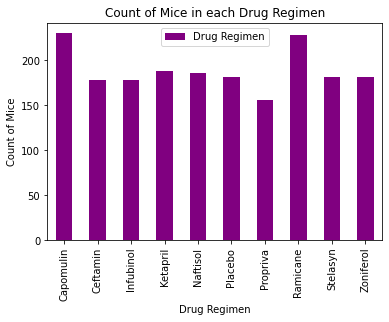

In [144]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
drugGrp= cleanedDF.groupby("Drug Regimen")
drugGrpCount= pd.DataFrame(drugGrp["Drug Regimen"].count())

graph=drugGrpCount.plot(kind='bar', color="Purple")
#label the bar graph
graph.set_title("Count of Mice in each Drug Regimen")
graph.set_xlabel("Drug Regimen")
graph.set_ylabel("Count of Mice")
plt.show()

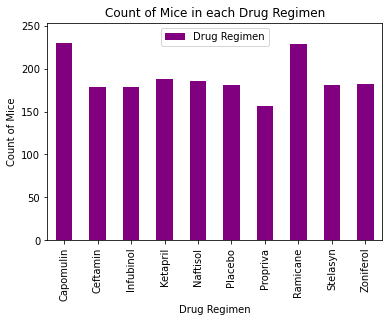

In [145]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
#tick locations

X_Axis= np.arange(len(drugGrpCount))
tick_locations=[value for value in X_Axis]
#tick_locations

#create graph
plt.bar(X_Axis, drugGrpCount["Drug Regimen"], color="purple", width=.5)
plt.xticks(tick_locations, list(drugGrpCount.index), rotation="vertical")
#set lims
plt.xlim(-.5, len(X_Axis)-.5)
plt.ylim(0, max(drugGrpCount["Drug Regimen"])*1.1)
#titles
plt.title("Count of Mice in each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count of Mice")
name=["Drug Regimen"]
plt.legend(name, loc="Upper center")
plt.show()


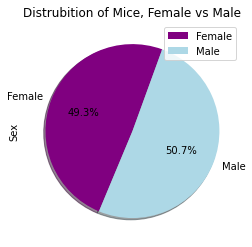

In [146]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#find groupings by gender
genderGroup=cleanedDF.groupby("Sex")
genderCount=pd.DataFrame(genderGroup["Sex"].count())
#genderCount.head()

#create pie graph
genderCount.plot(kind="pie", y="Sex", title="Distrubition of Mice, Female vs Male", startangle=70, autopct="%1.1f%%", colors=["purple","lightblue"],shadow=True)
plt.show()


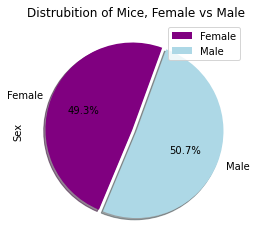

In [147]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=["Female", "Male"]
colors=["purple", "lightblue"]
genders=(genderGroup["Sex"].count())
explode=(.05,0)

plt.pie(genders, labels=labels, explode=explode, autopct="%1.1f%%", colors=colors, startangle=70, shadow=True)
plt.title("Distrubition of Mice, Female vs Male")
plt.ylabel("Sex")
plt.legend(labels,loc="best")
plt.show()

## Quartiles, Outliers and Boxplots

In [148]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint




#combine the data 
drugList=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugDF=cleanedDF[cleanedDF["Drug Regimen"].isin(drugList)]
drugDF

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


In [149]:
#now group them together
lastTumor = drugDF.groupby(['Drug Regimen','Mouse ID']).agg(\
        Last_tumor_size=('Tumor Volume (mm3)',lambda x: x.iloc[-1])).round(3)
lastTumor

Last_tumor_size
Drug Regimen Mouse ID                 
Capomulin    b128               38.983
             b742               38.940
             f966               30.486
             g288               37.074
             g316               40.159
...                                ...
Ramicane     s508               30.276
             u196               40.668
             w678               43.166
             y449               44.183
             z578               30.639

[100 rows x 1 columns]

In [150]:
#flip so drugs are listed on the top so you can actually do the loop through 
finalLastTumorSize= lastTumor.stack(level=0).unstack(level=0)
finalLastTumorSize.head()

,Drug Regimen,Capomulin,Ceftamin,Infubinol,Ramicane
Mouse ID,,,,,
a203,Last_tumor_size,NaN,NaN,67.973,NaN
a251,Last_tumor_size,NaN,NaN,65.526,NaN
a275,Last_tumor_size,NaN,62.999,NaN,NaN
a411,Last_tumor_size,NaN,NaN,NaN,38.408
a444,Last_tumor_size,NaN,NaN,NaN,43.048


In [161]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
counter=0

for drug in drugList:
    quartiles = finalLastTumorSize[drug].quantile([.25,.5,.75]).round(2)
    lowerQ = quartiles[0.25].round(2)
    upperQ = quartiles[0.75].round(2)
    IQR = round(upperQ-lowerQ,2)
    lowerBound = round(lowerQ - (1.5*IQR),2)
    upperBound = round(upperQ + (1.5*IQR),2)
    
    print(f"-------------------------------------------")
    print(f"IQR Data for {drug}:")
    print(f"Lower Quartile for {drug} is= {lowerQ}")
    print(f"Upper Quartile for {drug} is= {upperQ}")
    print(f"IQR for {drug}= {IQR}")
    print(f"Lower Bound for {drug} is= {lowerBound}--if values are BELOW this, it could be an Outlier")
    print(f"Upper Bound for {drug} is= {upperBound}--if values are ABOVE this, it could be an Outlier")
    print(f"-------------------------------------------")
    counter+=1
    


-------------------------------------------
IQR Data for Capomulin:
Lower Quartile for Capomulin is= 32.38
Upper Quartile for Capomulin is= 40.16
IQR for Capomulin= 7.78
Lower Bound for Capomulin is= 20.71--if values are BELOW this, it could be an Outlier
Upper Bound for Capomulin is= 51.83--if values are ABOVE this, it could be an Outlier
-------------------------------------------
-------------------------------------------
IQR Data for Ramicane:
Lower Quartile for Ramicane is= 31.56
Upper Quartile for Ramicane is= 40.66
IQR for Ramicane= 9.1
Lower Bound for Ramicane is= 17.91--if values are BELOW this, it could be an Outlier
Upper Bound for Ramicane is= 54.31--if values are ABOVE this, it could be an Outlier
-------------------------------------------
-------------------------------------------
IQR Data for Infubinol:
Lower Quartile for Infubinol is= 54.05
Upper Quartile for Infubinol is= 65.53
IQR for Infubinol= 11.48
Lower Bound for Infubinol is= 36.83--if values are BELOW this, i

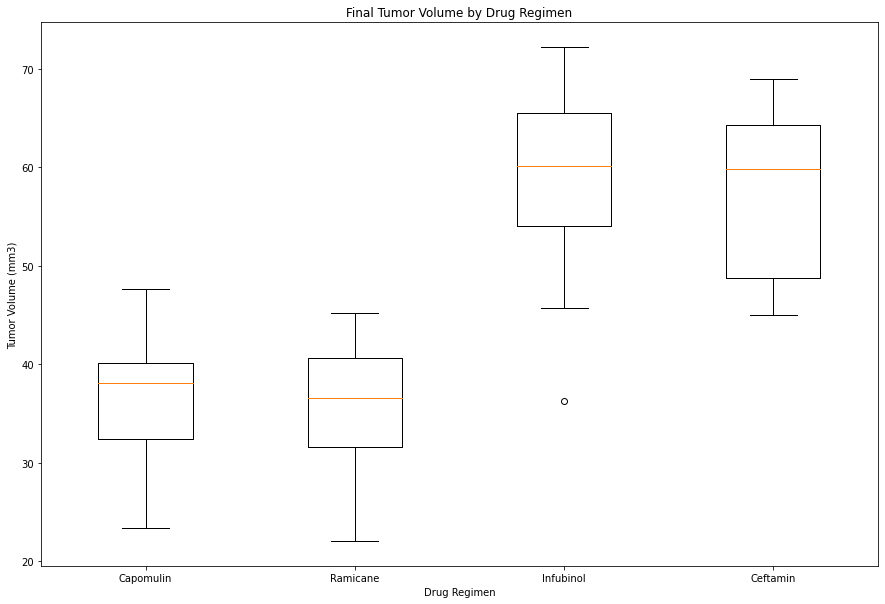

In [162]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxplot_List= []
for drug in four_drug_list:
    boxplot_List.append(list(finalLastTumorSize[drug].dropna()))
    
fig1, ax=plt.subplots(figsize=(15,10))
ax.set_title("Final Tumor Volume by Drug Regimen")
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Tumor Volume (mm3)")
ax.boxplot(boxplot_List, notch=0, sym='o')
plt.xticks([1, 2, 3, 4],drugList)
plt.show()

## Line and Scatter Plots

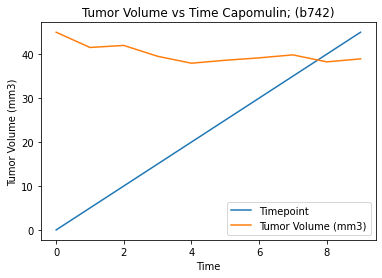

In [153]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#mouse i557 chosen from list
mouseVT = cleanedDF[cleanedDF["Mouse ID"].isin(["b742"])]
mouseVT

VTdata = mouseVT[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
VTdata

linePlotDF = VTdata.reset_index()
linePlotDF

finalLinePlot = linePlotDF[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
finalLinePlot

lines = finalLinePlot.plot.line()
plt.xlabel("Time")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume vs Time Capomulin; (b742)")
plt.show()

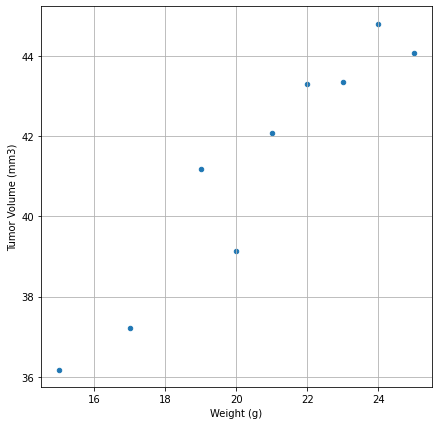

In [154]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

cScatter = cleanedDF[cleanedDF["Drug Regimen"].isin(["Capomulin"])]
cScatterDF = drugDF[["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]
cScatterPlot = cScatter.reset_index()
cSorted = cScatterPlot.sort_values(["Weight (g)"], ascending=True)
cGrouped = cScatterPlot.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()
cGroupPlot = pd.DataFrame(cGrouped).reset_index()

cScatterPlot = cGroupPlot.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', grid = True, figsize= (7,7))

## Correlation and Regression

The r-squared is: 0.950524396185527
The equation of the regression line is: y = 0.89x + 22.76


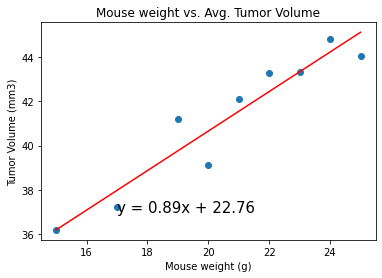

In [160]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
from scipy import stats

#get variables for the line
x_values = cGroupPlot["Weight (g)"]
y_values = cGroupPlot["Tumor Volume (mm3)"]
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'

#set up the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=15,color="black")
plt.title("Mouse weight vs. Avg. Tumor Volume")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")
print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")


plt.show()